In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import math 
import sys

In [2]:
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData\\bom.movie_gross.csv.gz',
 './zippedData\\imdb.name.basics.csv.gz',
 './zippedData\\imdb.title.akas.csv.gz',
 './zippedData\\imdb.title.basics.csv.gz',
 './zippedData\\imdb.title.crew.csv.gz',
 './zippedData\\imdb.title.principals.csv.gz',
 './zippedData\\imdb.title.ratings.csv.gz',
 './zippedData\\tmdb.movies.csv.gz',
 './zippedData\\tn.movie_budgets.csv.gz']

In [3]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_").replace("_gz","") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [4]:
csv_files_dict.keys()

dict_keys(['bom_movie_gross', 'imdb_name_basics', 'imdb_title_akas', 'imdb_title_basics', 'imdb_title_crew', 'imdb_title_principals', 'imdb_title_ratings', 'tmdb_movies', 'tn_movie_budgets'])

In [5]:
bom_movie_gross = csv_files_dict['bom_movie_gross']
imdb_name_basics = csv_files_dict['imdb_name_basics']
imdb_title_akas = csv_files_dict['imdb_title_akas']
imdb_title_basics = csv_files_dict['imdb_title_basics']
imdb_title_crew = csv_files_dict['imdb_title_crew']
imdb_title_principals = csv_files_dict['imdb_title_principals']
imdb_title_ratings = csv_files_dict['imdb_title_ratings']
tmdb_movies = csv_files_dict['tmdb_movies']
movie_budgets = csv_files_dict['tn_movie_budgets']

In [6]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [7]:
bom_movie_gross
#drop foreign_gross,use studio if need

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [8]:
print('Percentage of Null foreign_gross values:', len(bom_movie_gross[bom_movie_gross.foreign_gross.isna()])/ len(bom_movie_gross))

Percentage of Null foreign_gross values: 0.3985828166519043


We are going to remove the foreign_gross column as 40% of values are null

In [9]:
bom_movie_gross = bom_movie_gross.drop(['foreign_gross'], axis = 1)

In [10]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 3 columns):
studio            3382 non-null object
domestic_gross    3359 non-null float64
year              3387 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.8+ KB


Still need to remove null values from other columns

In [11]:
bom_movie_gross = bom_movie_gross.dropna()
bom_movie_gross.isna().sum()

studio            0
domestic_gross    0
year              0
dtype: int64

Null values removed! Data cleaned in bom_movie_gross_gz

In [12]:
movie_budgets.head() 

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
movie_budgets.sort_values(by='domestic_gross')

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
82,"Oct 26, 2012",Mientras duermes,"$5,000,000",$0,"$9,109,597"
9,"Nov 4, 2005",Wal-Mart: The High Cost of Low Price,"$1,500,000",$0,"$58,692"
8,"Jul 20, 2018",Teefa in Trouble,"$1,500,000",$0,"$98,806"
7,"Oct 17, 2014",Housebound,"$1,500,000",$0,"$236,863"
58,"Dec 31, 2008",Bathory,"$15,000,000",$0,"$3,436,763"
...,...,...,...,...,...
8,"Jun 13, 1997",Hercules,"$70,000,000","$99,112,101","$250,700,000"
74,"Jun 4, 1999",Desert Blue,"$5,000,000","$99,147","$99,147"
43,"Aug 3, 2018",Christopher Robin,"$75,000,000","$99,215,042","$197,504,758"


In [14]:
movie_budgets.worldwide_gross.value_counts(normalize= True)

$0              0.063473
$8,000,000      0.001557
$2,000,000      0.001038
$7,000,000      0.001038
$15,000,000     0.000692
                  ...   
$15,468,266     0.000173
$160,388,063    0.000173
$11,295,324     0.000173
$345,004,422    0.000173
$2,001,124      0.000173
Name: worldwide_gross, Length: 5356, dtype: float64

In [15]:
movie_budgets.production_budget.value_counts(normalize= True)

$20,000,000    0.039952
$10,000,000    0.036666
$30,000,000    0.030612
$15,000,000    0.029920
$25,000,000    0.029575
                 ...   
$12,800,000    0.000173
$1,455,000     0.000173
$775,000       0.000173
$16,400,000    0.000173
$9,000         0.000173
Name: production_budget, Length: 509, dtype: float64

In [16]:
movie_budgets.domestic_gross.value_counts(normalize= True)

$0             0.094777
$8,000,000     0.001557
$7,000,000     0.001211
$2,000,000     0.001211
$10,000,000    0.001038
                 ...   
$25,244,700    0.000173
$31,770,413    0.000173
$6,916,869     0.000173
$86,260,045    0.000173
$81,022,333    0.000173
Name: domestic_gross, Length: 5164, dtype: float64

In [17]:
movie_budgets = movie_budgets[movie_budgets['domestic_gross'] > 0]

TypeError: '>' not supported between instances of 'str' and 'int'

In [18]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: object(5)
memory usage: 271.0+ KB


In [19]:
def convert_amt_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int64')
    return df

In [20]:
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    movie_budgets = convert_amt_to_int(movie_budgets, col)

In [21]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


In [22]:
imdb_name_basics
#contains actors, directors etc

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...
nm9990381,Susan Grobes,NaN,NaN,actress,NaN
nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"


In [23]:
imdb_name_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(3)
memory usage: 27.8+ MB


In [24]:
print('Percentage of Null birth_year Values:', len(imdb_name_basics[imdb_name_basics.birth_year.isna()])/ len(imdb_name_basics))

Percentage of Null birth_year Values: 0.8636177816460286


In [25]:
print('Percentage of Null death_year Values:', len(imdb_name_basics[imdb_name_basics.death_year.isna()])/ len(imdb_name_basics))

Percentage of Null death_year Values: 0.9888188867349764


In [26]:
imdb_name_basics = imdb_name_basics.drop('birth_year', axis = 1)

In [27]:
imdb_name_basics = imdb_name_basics.drop('death_year', axis = 1)

In [28]:
imdb_name_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 3 columns):
primary_name          606648 non-null object
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: object(3)
memory usage: 18.5+ MB


In [29]:
imdb_name_basics = imdb_name_basics.dropna()
imdb_name_basics.isna().sum()

primary_name          0
primary_profession    0
known_for_titles      0
dtype: int64

In [30]:
imdb_title_akas.sort_values(by='region')

,ordering,title,region,language,types,attributes,is_original_title
title_id,,,,,,,
tt3156000,3,Nick,AD,NaN,NaN,NaN,0.0
tt6079382,1,Impacto,AD,NaN,NaN,NaN,0.0
tt5162282,1,73',AD,NaN,NaN,NaN,0.0
tt1811329,2,"Teta, Alf Marra",AE,NaN,NaN,NaN,0.0
tt7480896,1,Desert Dream,AE,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...
tt9723084,2,Anderswo. Allein in Afrika,NaN,NaN,original,NaN,1.0
tt9726638,2,Monkey King: The Volcano,NaN,NaN,original,NaN,1.0
tt9755806,3,Big Shark,NaN,NaN,original,NaN,1.0


In [31]:
imdb_title_akas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (total 7 columns):
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.2+ MB


In [32]:
print('Percentage of Null death_year Values:', len(imdb_title_akas[imdb_title_akas.language.isna()])/ len(imdb_title_akas))

Percentage of Null death_year Values: 0.87423990738703


In [33]:
print('Percentage of Null death_year Values:', len(imdb_title_akas[imdb_title_akas.attributes.isna()])/ len(imdb_title_akas))

Percentage of Null death_year Values: 0.9550049291082685


In [34]:
print('Percentage of Null death_year Values:', len(imdb_title_akas[imdb_title_akas.types.isna()])/ len(imdb_title_akas))

Percentage of Null death_year Values: 0.49217522904526034


In [35]:
imdb_title_akas = imdb_title_akas.drop('types', axis = 1)

In [36]:
imdb_title_akas = imdb_title_akas.drop('attributes', axis = 1)

In [37]:
imdb_title_akas = imdb_title_akas.drop('language', axis = 1)

In [38]:
imdb_title_akas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (total 4 columns):
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 12.7+ MB


In [39]:
imdb_title_akas['is_original_title'] = imdb_title_akas['is_original_title'].fillna(value = 0)

In [40]:
imdb_title_akas['region'] = imdb_title_akas['region'].fillna(value= 'no region')

In [41]:
imdb_title_crew

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...
tt8999974,nm10122357,nm10122357
tt9001390,nm6711477,nm6711477
tt9001494,"nm10123242,nm10123248",NaN


In [42]:
imdb_title_crew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(2)
memory usage: 3.3+ MB


In [43]:
imdb_title_crew.isna().sum()

directors     5727
writers      35883
dtype: int64

In [44]:
imdb_title_crew['writers'] = imdb_title_crew['writers'].fillna(value= 'unknown')
imdb_title_crew['directors'] = imdb_title_crew['directors'].fillna(value= 'unknown')

In [45]:
imdb_title_crew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
directors    146144 non-null object
writers      146144 non-null object
dtypes: object(2)
memory usage: 3.3+ MB


In [46]:
imdb_title_principals.head()

,ordering,nconst,category,job,characters
tconst,,,,,
tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
tt0111414,2,nm0398271,director,NaN,NaN
tt0111414,3,nm3739909,producer,producer,NaN
tt0323808,10,nm0059247,editor,NaN,NaN
tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [47]:
imdb_title_principals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028186 entries, tt0111414 to tt9692684
Data columns (total 5 columns):
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(4)
memory usage: 47.1+ MB


In [48]:
imdb_title_principals = imdb_title_principals.drop('job', axis = 1)
# Dropped job because it was redundent of catagory

In [49]:
imdb_title_principals['characters'] = imdb_title_principals['characters'].fillna(value= 'not applicable')

In [50]:
imdb_title_principals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028186 entries, tt0111414 to tt9692684
Data columns (total 4 columns):
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
characters    1028186 non-null object
dtypes: int64(1), object(3)
memory usage: 39.2+ MB


In [51]:
imdb_title_ratings

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
...,...,...
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14


In [52]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


In [53]:
imdb_title_ratings.averagerating.value_counts(normalize= True)

7.0     0.030627
6.6     0.030478
7.2     0.030451
6.8     0.030316
6.5     0.030072
          ...   
9.6     0.000244
10.0    0.000217
9.8     0.000203
9.7     0.000162
9.9     0.000068
Name: averagerating, Length: 91, dtype: float64

In [54]:
imdb_title_ratings.numvotes.value_counts(normalize= True)

6        0.038927
5        0.036544
7        0.033525
8        0.029341
9        0.026118
           ...   
18286    0.000014
16289    0.000014
1958     0.000014
4007     0.000014
4098     0.000014
Name: numvotes, Length: 7349, dtype: float64

In [55]:
tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [56]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [57]:
list_of_values= []
def value_count(df):
    for header in df:
         list_of_values.append(df[header].value_counts(normalize= True))
    

In [58]:
value_count(tmdb_movies)
list_of_values

[[99]                 0.139533
 []                   0.093487
 [18]                 0.085530
 [35]                 0.062601
 [27]                 0.043180
                        ...   
 [14, 18, 27, 35]     0.000038
 [9648, 16, 10751]    0.000038
 [12, 37, 99]         0.000038
 [35, 53, 10749]      0.000038
 [80, 18, 36, 53]     0.000038
 Name: genre_ids, Length: 2477, dtype: float64, 292086    0.000113
 463839    0.000113
 11976     0.000113
 391872    0.000113
 416572    0.000113
             ...   
 356987    0.000038
 350846    0.000038
 479871    0.000038
 500353    0.000038
 524288    0.000038
 Name: id, Length: 25497, dtype: float64, en    0.878342
 fr    0.019120
 es    0.017159
 ru    0.011238
 ja    0.009994
         ...   
 ha    0.000038
 af    0.000038
 nb    0.000038
 ky    0.000038
 si    0.000038
 Name: original_language, Length: 76, dtype: float64, Eden                            0.000264
 Home                            0.000226
 Lucky                           0.000

In [59]:
tmdb_movies = tmdb_movies[tmdb_movies['vote_count'] > 10]

In [60]:
rt_movie = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter = '\t', encoding = 'unicode_escape')

In [61]:
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [62]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [63]:
rt_movie = rt_movie.drop(['currency'], axis = 1)

In [64]:
rt_movie = rt_movie.drop(['box_office'], axis = 1)

In [65]:
movie_budgets.head() 

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [66]:
movie_budgets.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


In [67]:
display(bom_movie_gross)
movie_budgets

,studio,domestic_gross,year
title,,,
Toy Story 3,BV,415000000.0,2010
Alice in Wonderland (2010),BV,334200000.0,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
Inception,WB,292600000.0,2010
Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...
The Quake,Magn.,6200.0,2018
Edward II (2018 re-release),FM,4800.0,2018
El Pacto,Sony,2500.0,2018


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000,0,0
79,"Apr 2, 1999",Following,6000,48482,240495
80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


In [78]:
bom_movie_budget_merged = movie_budgets.merge(bom_movie_gross, on='domestic_gross', how='inner', indicator=True)

In [79]:
bom_movie_budget_merged.sort_values(by='domestic_gross', ascending=False)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,year,_merge
367,"Jun 28, 1978",Heaven Can Wait,15000000,98800000,98800000,Sony,2011,both
671,"Dec 15, 1974",Young Frankenstein,2800000,86300000,86300000,WB,2016,both
670,"Feb 15, 1950",Cinderella,2900000,85000000,263591415,LGF,2012,both
677,"Feb 9, 1940",Pinocchio,2289247,84300000,84300000,WB (NL),2014,both
604,"Jan 1, 1970",M*A*S*H,3500000,81600000,81600000,Fox,2010,both
...,...,...,...,...,...,...,...,...
237,"Jan 30, 2015",Wild Card,30000000,3200,4315789,Icar.,2015,both
236,"Jan 30, 2015",Wild Card,30000000,3200,4315789,Strand,2015,both
235,"Jan 30, 2015",Wild Card,30000000,3200,4315789,FRun,2011,both
810,"Dec 31, 2004",The Mongol King,7000,900,900,Distrib.,2013,both


In [70]:
rt_movie_movie_budged_merged= rt_movie.merge(movie_budgets, left_on='theater_date', right_on='release_date', how='inner')

In [71]:
rt_movie_movie_budged_merged

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,studio,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,NaN,"Oct 9, 1971",The French Connection,2200000,41158757,41158757
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Entertainment One,"Aug 17, 2012",The Expendables 2,100000000,85028192,311979256
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Entertainment One,"Aug 17, 2012",ParaNorman,60000000,56003051,108119662
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Entertainment One,"Aug 17, 2012",Sparkle,10000000,24397469,24660323
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Entertainment One,"Aug 17, 2012",The Awakening,4900000,95933,6924321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,1995,"Special government agent James West, long on c...",PG-13,Action and Adventure|Comedy|Western,Barry Sonnenfeld,NaN,"Jun 30, 1999","Nov 30, 1999",107 minutes,Warner Bros. Pictures,"Jun 30, 1999","South Park: Bigger, Longer & Uncut",21000000,52037603,52037603
2068,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",106 minutes,New Line Cinema,"Aug 18, 2006",Snakes on a Plane,33000000,34020814,62020814
2069,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",106 minutes,New Line Cinema,"Aug 18, 2006",The Illusionist,16500000,39868642,83792062
2070,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",106 minutes,New Line Cinema,"Aug 18, 2006",Trust the Man,9000000,1530535,2548378


In [72]:
rt_movie_movie_budged_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 15 columns):
id                   2072 non-null int64
synopsis             2071 non-null object
rating               2072 non-null object
genre                2072 non-null object
director             1832 non-null object
writer               1708 non-null object
theater_date         2072 non-null object
dvd_date             2072 non-null object
runtime              2057 non-null object
studio               1523 non-null object
release_date         2072 non-null object
movie                2072 non-null object
production_budget    2072 non-null int64
domestic_gross       2072 non-null int64
worldwide_gross      2072 non-null int64
dtypes: int64(4), object(11)
memory usage: 259.0+ KB


In [73]:
movie_ratings= rt_movie_movie_budged_merged['rating'].unique()
movie_ratings

array(['R', 'PG', 'PG-13', 'NR', 'G', 'NC17'], dtype=object)

In [74]:
import statistics as stats

In [75]:
rating_grossed={}
def rating_avg(i):
    for rating in i:
        rating_grossed[rating]= stats.mean(rt_movie_movie_budged_merged['domestic_gross'].loc[rt_movie_movie_budged_merged['rating'] == rating])

In [76]:
rating_avg(movie_ratings)
rating_grossed.items()



dict_items([('R', 39302209.04310345), ('PG', 52448922.95924765), ('PG-13', 40744248.395833336), ('NR', 40406109.75510204), ('G', 32761541.229166668), ('NC17', 18000149.4)])

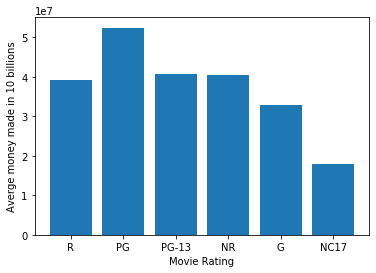

In [77]:
plt.bar(*zip(*rating_grossed.items()));
plt.ylabel('Averge money made in 10 billions')
plt.xlabel('Movie Rating')
plt.show()
